In [1]:
from helpers_merging import *

initial_power = 100* si.uW
initial_waist = 1.1*si.uW
initial_distance = 3*si.um

trap: DoubleTweezer = DoubleTweezer(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= 0*si.G/si.cm,
    grad_r=0,
    power_tweezer1 = initial_power,     #stationary
    power_tweezer2 = initial_power,     #transfer tweezer
    waist_tweezer1 = initial_waist,     #stationary
    waist_tweezer2 = initial_waist*1.02,     #transfer tweezer
    distance_tweezers = initial_distance,

    a=180*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),
    wvl = 532 * si.nm,

    g = 0,
)

x, y, z = trap.x, trap.y, trap.z

## Make nice plots to show how the eigenenergies behave for different tweezer powers and waists

crossover of states [[4 5]] at 1.48um
crossover of states [[2 3]] at 1.39um
crossover of states [[0 1]] at 1.30um


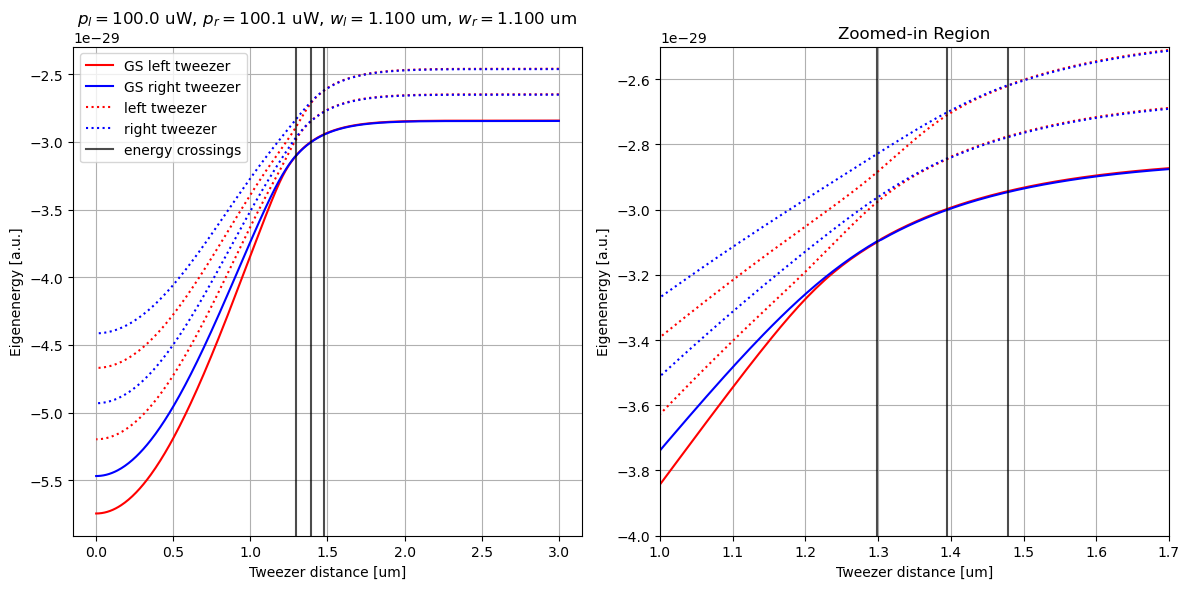

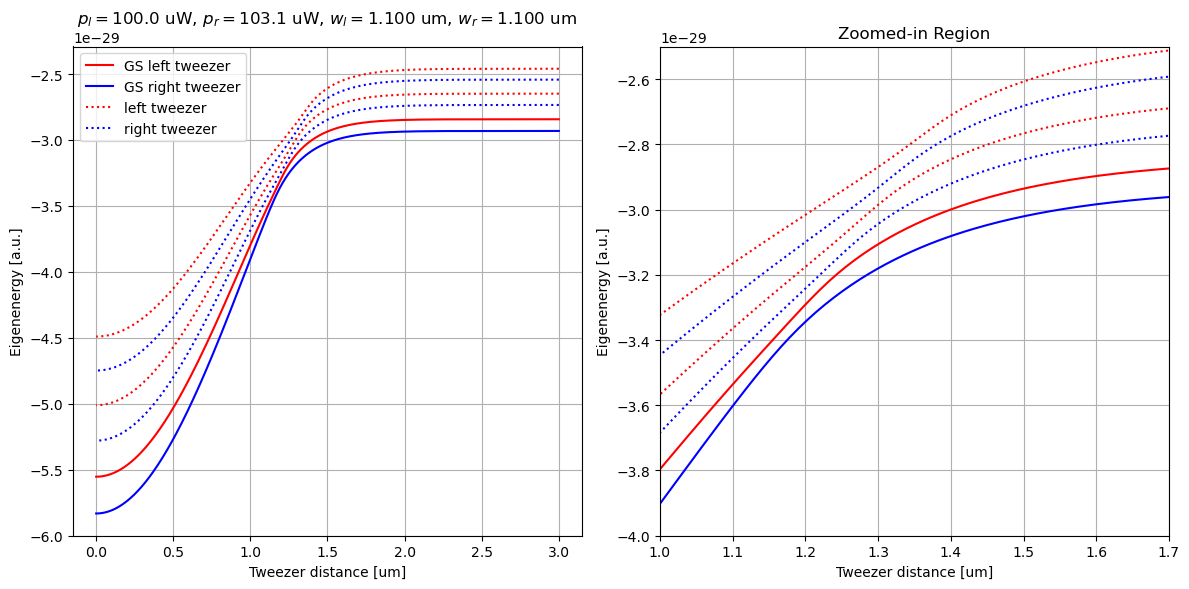

crossover of states [[1 2]] at 1.33um


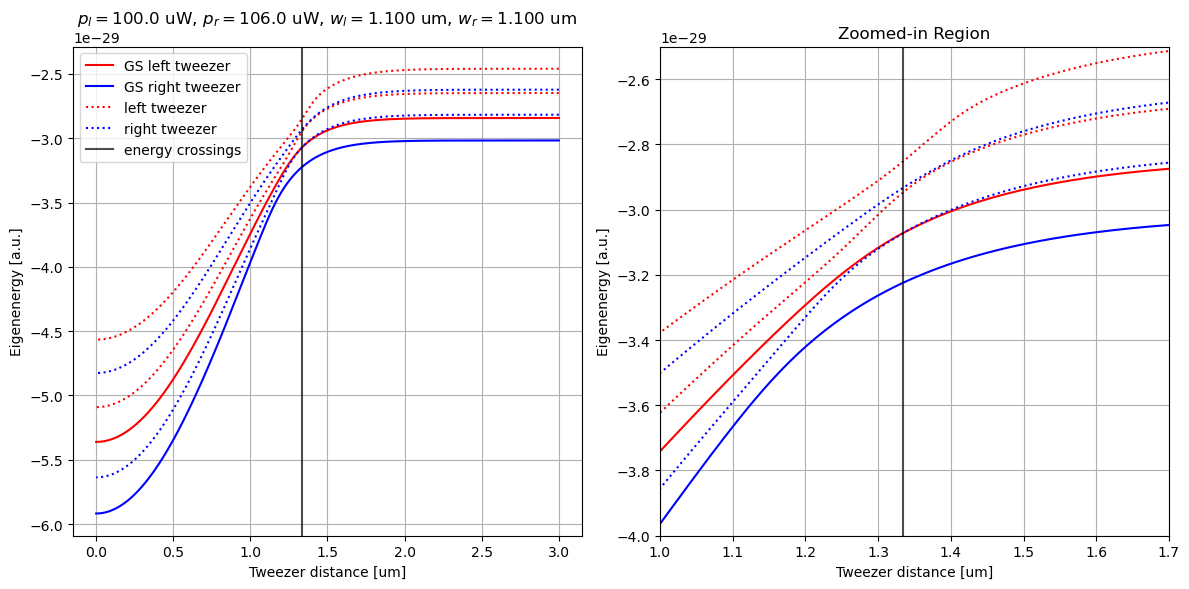

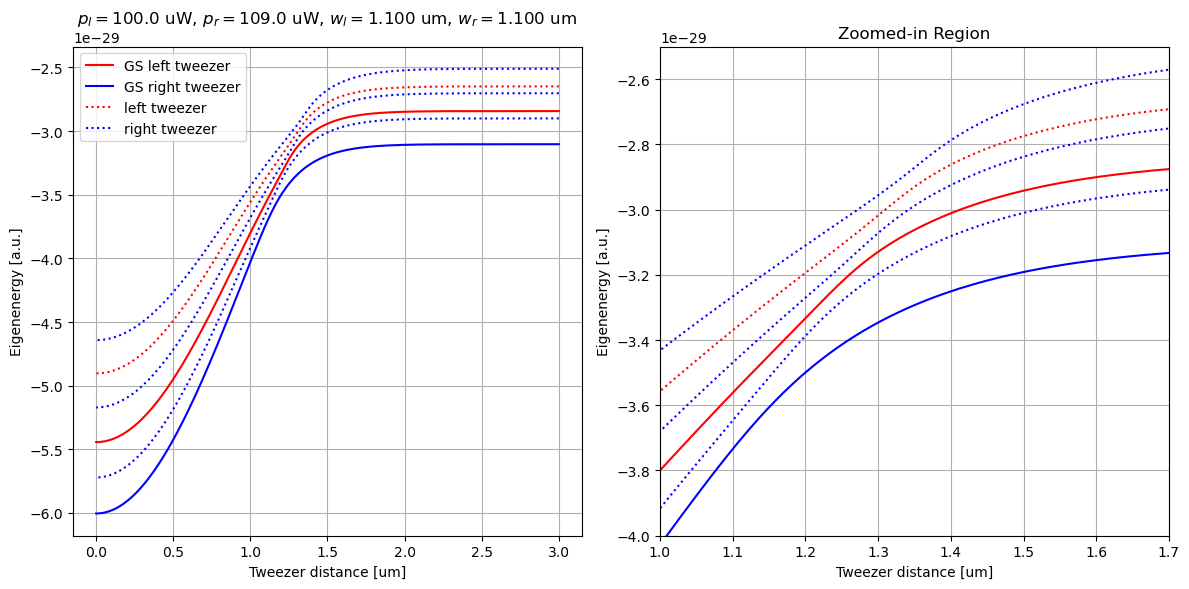

In [2]:
#make multiple plots showing the eigenenergies for different tweezer powers

power2_factors = np.linspace(1+1e-3,1.09,4)

for i, pow in enumerate(power2_factors):
    #make sure the powers and waists are set correctly
    trap[trap.power_tweezer1] = initial_power
    trap[trap.power_tweezer2] = initial_power*pow

    trap[trap.waist_tweezer1] = initial_waist
    trap[trap.waist_tweezer2] = initial_waist
    
    #calculate eigenenergies
    distances = np.linspace(initial_distance,0*si.um,500)
    energies, states, potentials = loop_distances(trap, distances,n_levels=6,n_pot_steps=2000)

    new_energies, new_states, new_potentials, index_top, index, swap_index = swapped_loop_distance(distances, energies, states, potentials)
    energies_left, energies_right, states_left, states_right,deltaE_min, occ_num = find_ass_tweezer(new_energies,new_states)

    # Create the figure with two subplots (1 row, 2 columns)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the full range on ax1
    ax1.plot(distances/si.um, energies_left[:, 0], color="red", label="GS left tweezer")
    ax1.plot(distances/si.um, energies_right[:, 0], color="blue", label="GS right tweezer")
    ax1.plot(distances/si.um, energies_left[:, 1:], color="red", linestyle="dotted", label="left tweezer")
    ax1.plot(distances/si.um, energies_right[:, 1:], color="blue", linestyle="dotted", label="right tweezer")

    for i, ind in enumerate(index):
        ax1.axvline(distances[ind]/si.um, color="k", alpha=0.7, label="energy crossings")

    ax1.set_xlabel("Tweezer distance [um]")
    ax1.set_ylabel("Eigenenergy [a.u.]")
    ax1.set_title(fr"$p_l={float(trap.subs(trap.power_tweezer1))/si.uW:.1f}$ uW, $p_r={float(trap.subs(trap.power_tweezer2))/si.uW:.1f}$ uW, $w_l={float(trap.subs(trap.waist_tweezer1))/si.um:.3f}$ um, $w_r={float(trap.subs(trap.waist_tweezer2))/si.um:.3f}$ um")
    ax1.grid()

    # Plot the zoomed-in range (1 to 1.5 µm) on ax2
    ax2.plot(distances/si.um, energies_left[:, 0], color="red", label="GS left tweezer")
    ax2.plot(distances/si.um, energies_right[:, 0], color="blue", label="GS right tweezer")
    ax2.plot(distances/si.um, energies_left[:, 1:], color="red", linestyle="dotted", label="left tweezer")
    ax2.plot(distances/si.um, energies_right[:, 1:], color="blue", linestyle="dotted", label="right tweezer")

    for i, ind in enumerate(index):
        ax2.axvline(distances[ind]/si.um, color="k", alpha=0.7, label="energy crossings")

    ax2.set_xlabel("Tweezer distance [um]")
    ax2.set_ylabel("Eigenenergy [a.u.]")
    ax2.set_title("Zoomed-in Region")
    ax2.set_xlim(1, 1.7)  # Zooming in on the region between 1.0 and 1.5 µm
    ax2.set_ylim(-4e-29,-2.5e-29)
    ax2.grid()

    # Remove duplicates in the legend (labels that appear in both subplots)
    handles, labels = ax1.get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))  # Remove duplicates
    ax1.legend(unique_labels.values(), unique_labels.keys())

    # Show the plots
    plt.tight_layout()
    plt.show()


## The same can be done with the waist, but it's more sensitive here:

crossover of states [[2 3]] at 1.46um
crossover of states [[0 1]] at 1.35um


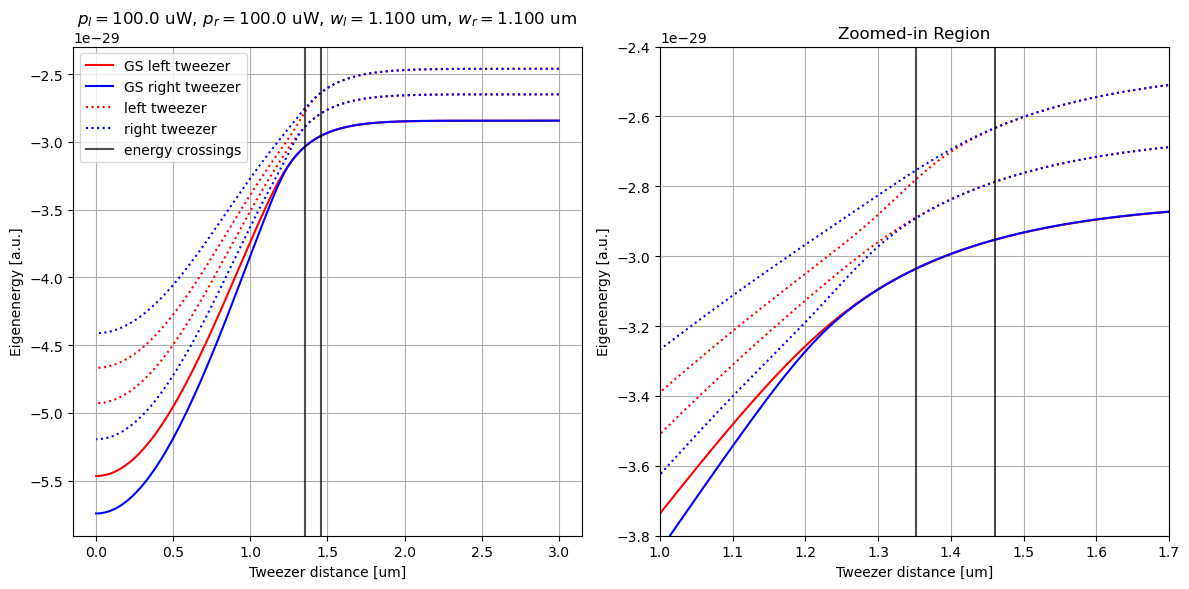

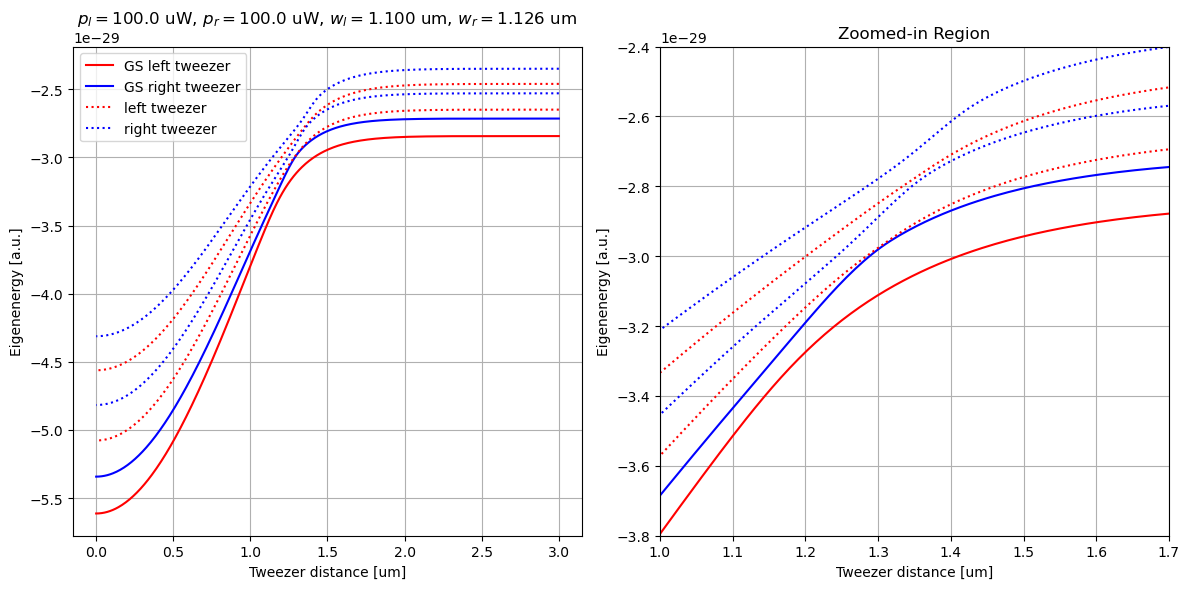

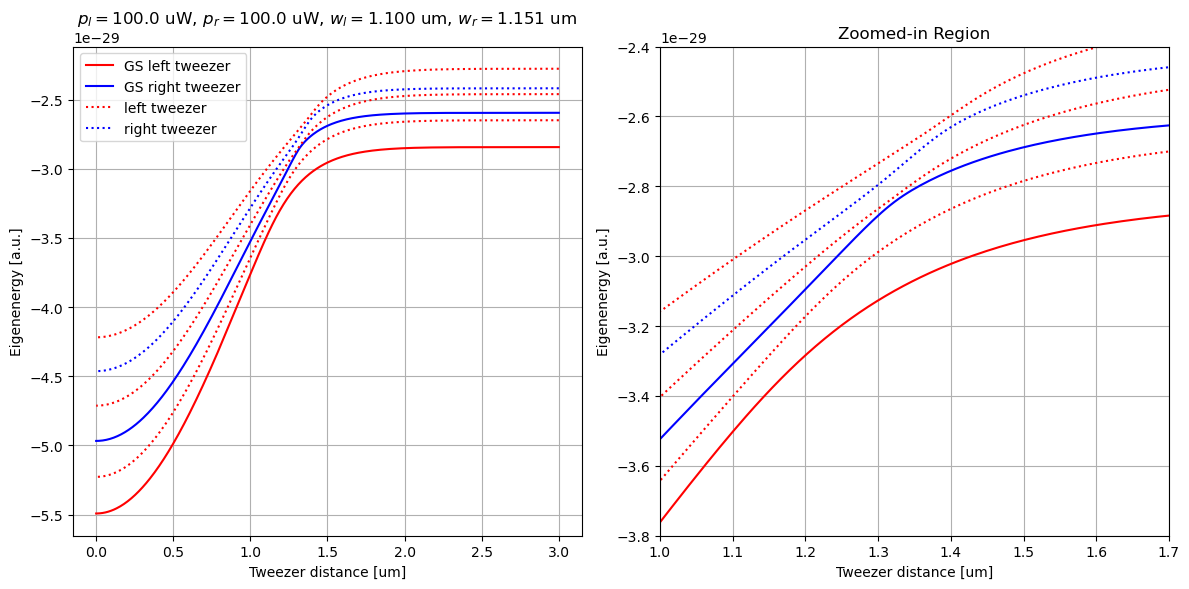

crossover of states [[2 3]] at 1.83um
crossover of states [[4 5]] at 1.74um
crossover of top state at 1.74um


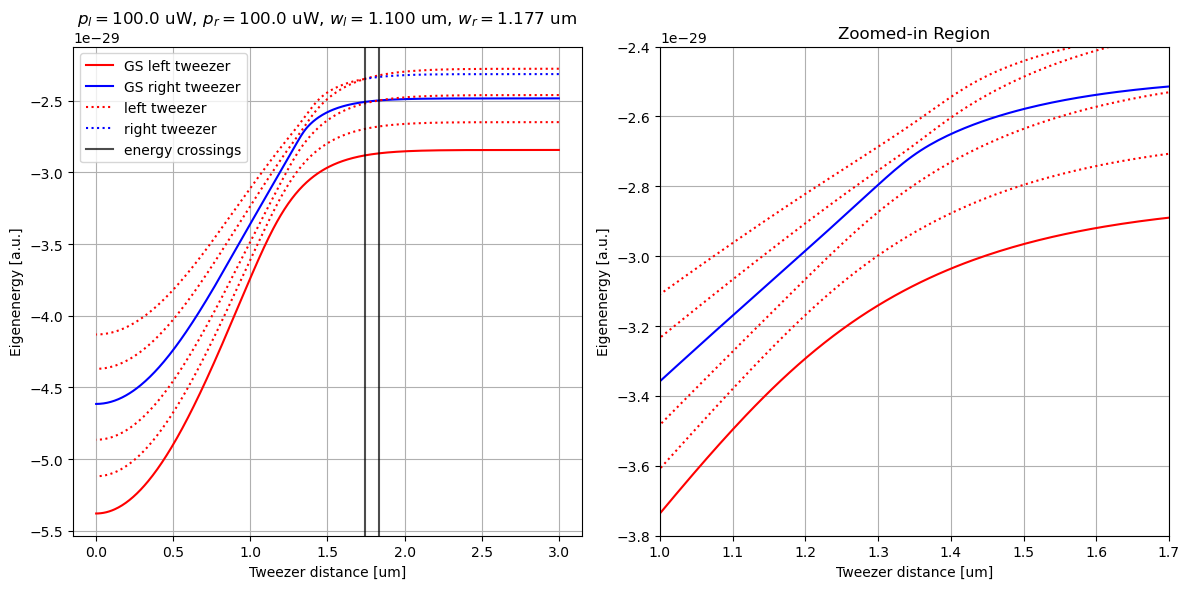

In [3]:
#make multiple plots showing the eigenenergies for different tweezer waists

waist2_factors = np.linspace(1+1e-4,1.07,4)

for i, w0 in enumerate(waist2_factors):
    #make sure the powers and waists are set correctly
    trap[trap.power_tweezer1] = initial_power
    trap[trap.power_tweezer2] = initial_power

    trap[trap.waist_tweezer1] = initial_waist
    trap[trap.waist_tweezer2] = initial_waist*w0
    
    #calculate eigenenergies
    distances = np.linspace(initial_distance,0*si.um,500)
    energies, states, potentials = loop_distances(trap, distances,n_levels=6,n_pot_steps=2000)

    new_energies, new_states, new_potentials, index_top, index, swap_index = swapped_loop_distance(distances, energies, states, potentials)
    energies_left, energies_right, states_left, states_right,deltaE_min, occ_num = find_ass_tweezer(new_energies,new_states)

    # Create the figure with two subplots (1 row, 2 columns)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the full range on ax1
    ax1.plot(distances/si.um, energies_left[:, 0], color="red", label="GS left tweezer")
    ax1.plot(distances/si.um, energies_right[:, 0], color="blue", label="GS right tweezer")
    ax1.plot(distances/si.um, energies_left[:, 1:], color="red", linestyle="dotted", label="left tweezer")
    ax1.plot(distances/si.um, energies_right[:, 1:], color="blue", linestyle="dotted", label="right tweezer")

    for i, ind in enumerate(index):
        ax1.axvline(distances[ind]/si.um, color="k", alpha=0.7, label="energy crossings")

    ax1.set_xlabel("Tweezer distance [um]")
    ax1.set_ylabel("Eigenenergy [a.u.]")
    ax1.set_title(fr"$p_l={float(trap.subs(trap.power_tweezer1))/si.uW:.1f}$ uW, $p_r={float(trap.subs(trap.power_tweezer2))/si.uW:.1f}$ uW, $w_l={float(trap.subs(trap.waist_tweezer1))/si.um:.3f}$ um, $w_r={float(trap.subs(trap.waist_tweezer2))/si.um:.3f}$ um")
    ax1.grid()

    # Plot the zoomed-in range (1 to 1.5 µm) on ax2
    ax2.plot(distances/si.um, energies_left[:, 0], color="red", label="GS left tweezer")
    ax2.plot(distances/si.um, energies_right[:, 0], color="blue", label="GS right tweezer")
    ax2.plot(distances/si.um, energies_left[:, 1:], color="red", linestyle="dotted", label="left tweezer")
    ax2.plot(distances/si.um, energies_right[:, 1:], color="blue", linestyle="dotted", label="right tweezer")

    for i, ind in enumerate(index):
        ax2.axvline(distances[ind]/si.um, color="k", alpha=0.7, label="energy crossings")

    ax2.set_xlabel("Tweezer distance [um]")
    ax2.set_ylabel("Eigenenergy [a.u.]")
    ax2.set_title("Zoomed-in Region")
    ax2.set_xlim(1, 1.7)  # Zooming in on the region between 1.0 and 1.5 µm
    ax2.set_ylim(-3.8e-29,-2.4e-29)
    ax2.grid()

    # Remove duplicates in the legend (labels that appear in both subplots)
    handles, labels = ax1.get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))  # Remove duplicates
    ax1.legend(unique_labels.values(), unique_labels.keys())

    # Show the plots
    plt.tight_layout()
    plt.show()


## Can a difference in waist be compensated by changing the power?

crossover of states [[2 3]] at 1.52um
crossover of states [[4 5]] at 1.49um
crossover of top state at 1.30um


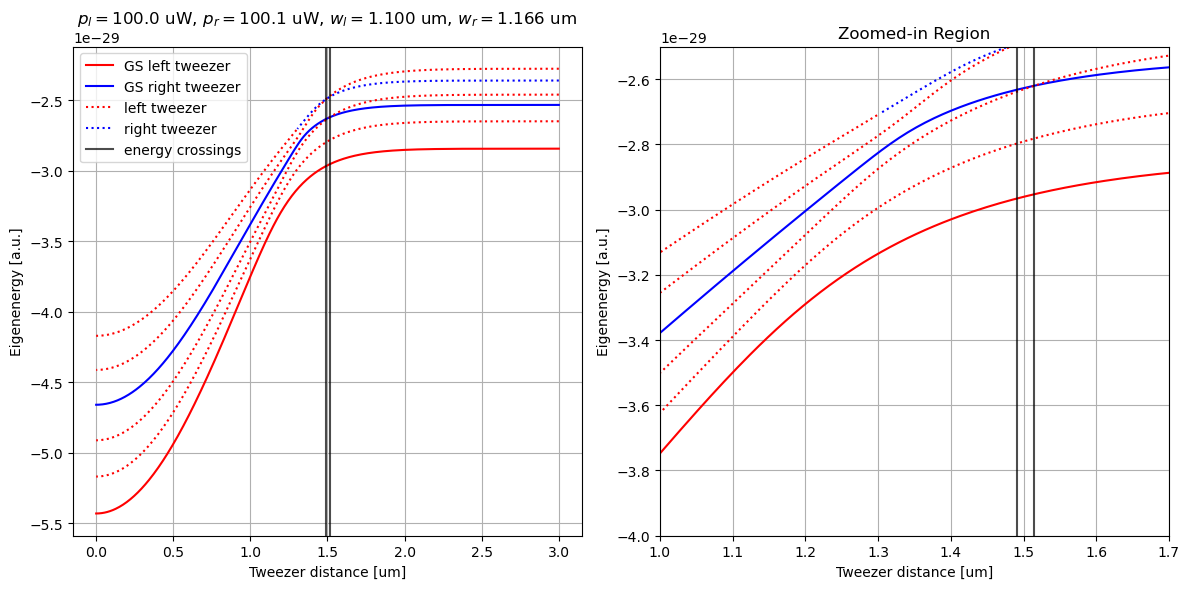

crossover of states [[1 2]] at 1.89um
crossover of states [[3 4]] at 1.77um
crossover of top state at 1.69um


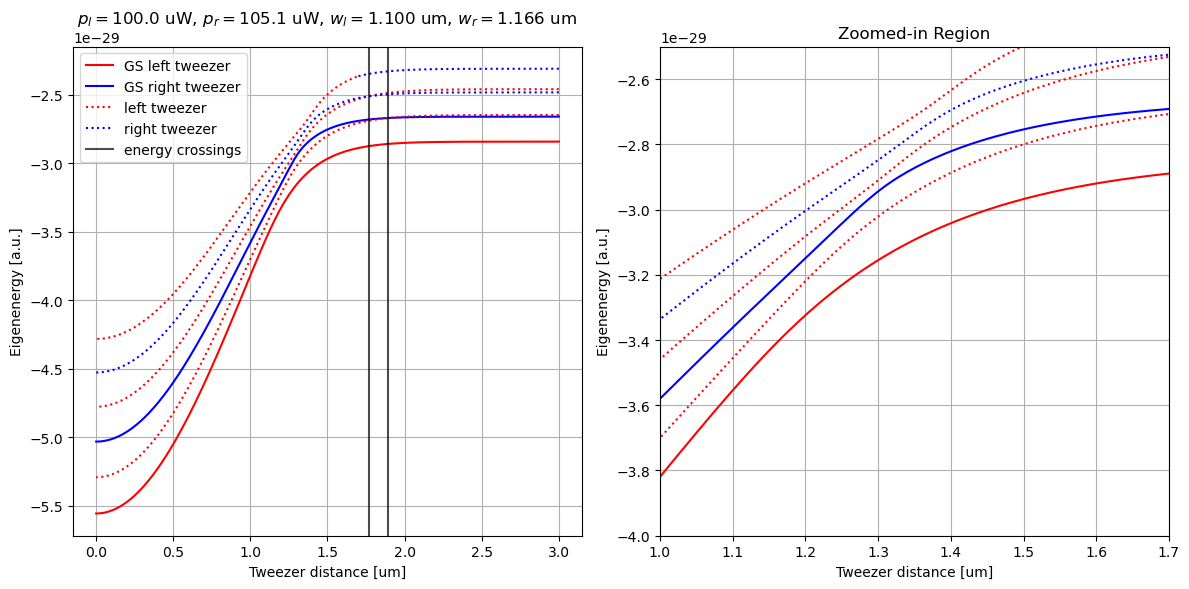

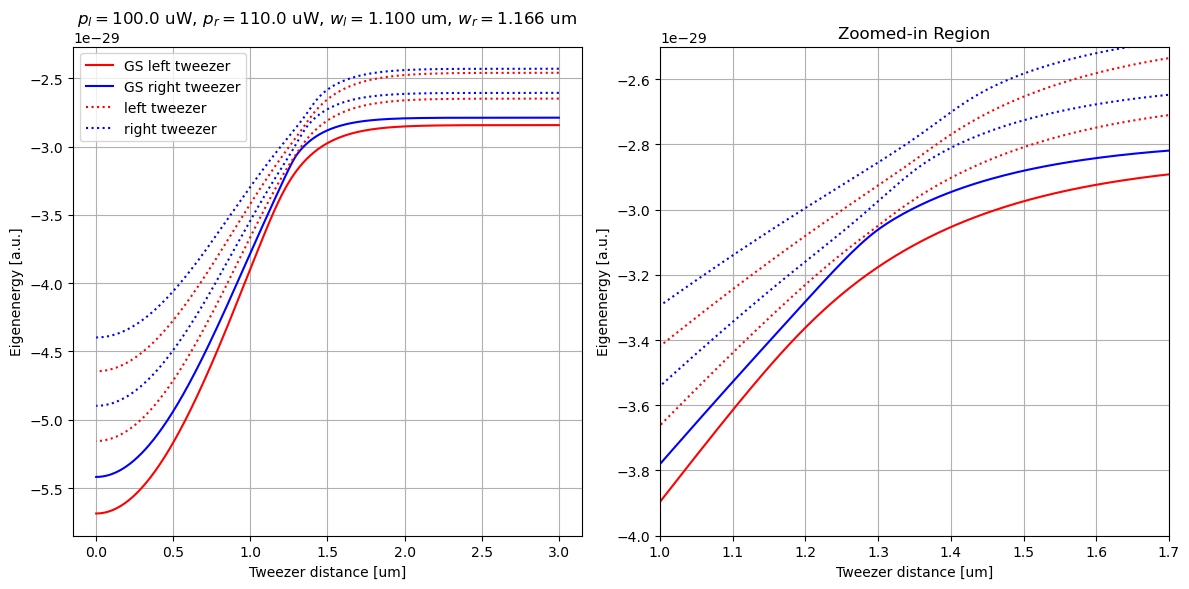

crossover of top state at 1.41um
crossover of states [[0 1]] at 1.38um


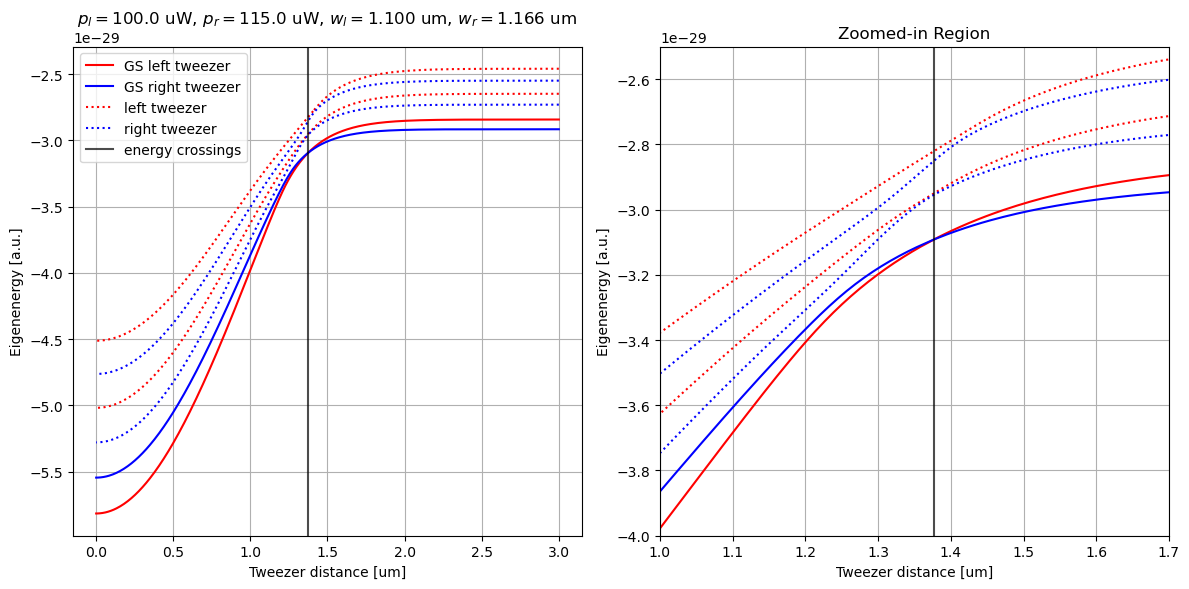

In [4]:
#set the waists to be sligthly different and compensate by changing the power

power2_factors = np.linspace(1+1e-3,1.15,4)

for i, pow in enumerate(power2_factors):
    #make sure the powers and waists are set correctly
    trap[trap.power_tweezer1] = initial_power
    trap[trap.power_tweezer2] = initial_power*pow

    trap[trap.waist_tweezer1] = initial_waist
    trap[trap.waist_tweezer2] = initial_waist*1.06
    
    #calculate eigenenergies
    distances = np.linspace(initial_distance,0*si.um,500)
    energies, states, potentials = loop_distances(trap, distances,n_levels=6,n_pot_steps=2000)

    new_energies, new_states, new_potentials, index_top, index, swap_index = swapped_loop_distance(distances, energies, states, potentials)
    energies_left, energies_right, states_left, states_right,deltaE_min, occ_num = find_ass_tweezer(new_energies,new_states)

    # Create the figure with two subplots (1 row, 2 columns)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the full range on ax1
    ax1.plot(distances/si.um, energies_left[:, 0], color="red", label="GS left tweezer")
    ax1.plot(distances/si.um, energies_right[:, 0], color="blue", label="GS right tweezer")
    ax1.plot(distances/si.um, energies_left[:, 1:], color="red", linestyle="dotted", label="left tweezer")
    ax1.plot(distances/si.um, energies_right[:, 1:], color="blue", linestyle="dotted", label="right tweezer")

    for i, ind in enumerate(index):
        ax1.axvline(distances[ind]/si.um, color="k", alpha=0.7, label="energy crossings")

    ax1.set_xlabel("Tweezer distance [um]")
    ax1.set_ylabel("Eigenenergy [a.u.]")
    ax1.set_title(fr"$p_l={float(trap.subs(trap.power_tweezer1))/si.uW:.1f}$ uW, $p_r={float(trap.subs(trap.power_tweezer2))/si.uW:.1f}$ uW, $w_l={float(trap.subs(trap.waist_tweezer1))/si.um:.3f}$ um, $w_r={float(trap.subs(trap.waist_tweezer2))/si.um:.3f}$ um")
    ax1.grid()

    # Plot the zoomed-in range (1 to 1.5 µm) on ax2
    ax2.plot(distances/si.um, energies_left[:, 0], color="red", label="GS left tweezer")
    ax2.plot(distances/si.um, energies_right[:, 0], color="blue", label="GS right tweezer")
    ax2.plot(distances/si.um, energies_left[:, 1:], color="red", linestyle="dotted", label="left tweezer")
    ax2.plot(distances/si.um, energies_right[:, 1:], color="blue", linestyle="dotted", label="right tweezer")

    for i, ind in enumerate(index):
        ax2.axvline(distances[ind]/si.um, color="k", alpha=0.7, label="energy crossings")

    ax2.set_xlabel("Tweezer distance [um]")
    ax2.set_ylabel("Eigenenergy [a.u.]")
    ax2.set_title("Zoomed-in Region")
    ax2.set_xlim(1, 1.7)  # Zooming in on the region between 1.0 and 1.5 µm
    ax2.set_ylim(-4e-29,-2.5e-29)
    ax2.grid()

    # Remove duplicates in the legend (labels that appear in both subplots)
    handles, labels = ax1.get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))  # Remove duplicates
    ax1.legend(unique_labels.values(), unique_labels.keys())

    # Show the plots
    plt.tight_layout()
    plt.show()


## Seems like it works, but if the different in waists is too large:

Then the energies of both tweezer fall of at different rates and they cross at all powers.

crossover of states [[0 1]] at 1.87um
crossover of states [[2 3]] at 1.75um
crossover of states [[4 5]] at 1.68um


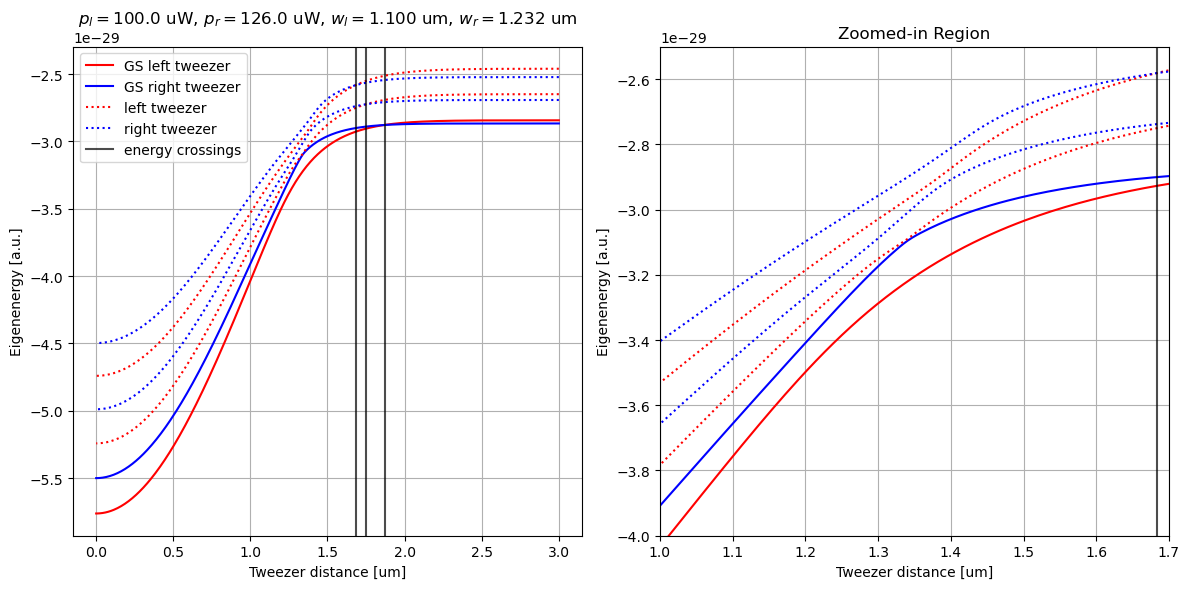

crossover of states [[0 1]] at 1.44um
crossover of top state at 1.44um
crossover of states [[2 3]] at 1.42um


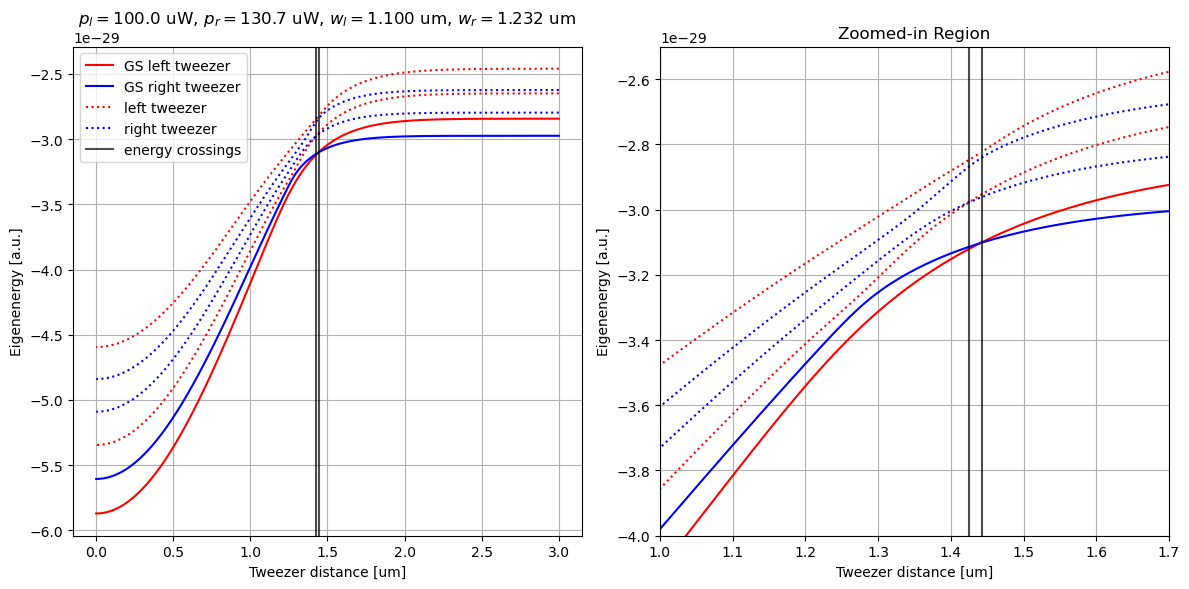

crossover of states [[1 2]] at 1.62um
crossover of states [[3 4]] at 1.58um
crossover of top state at 1.55um


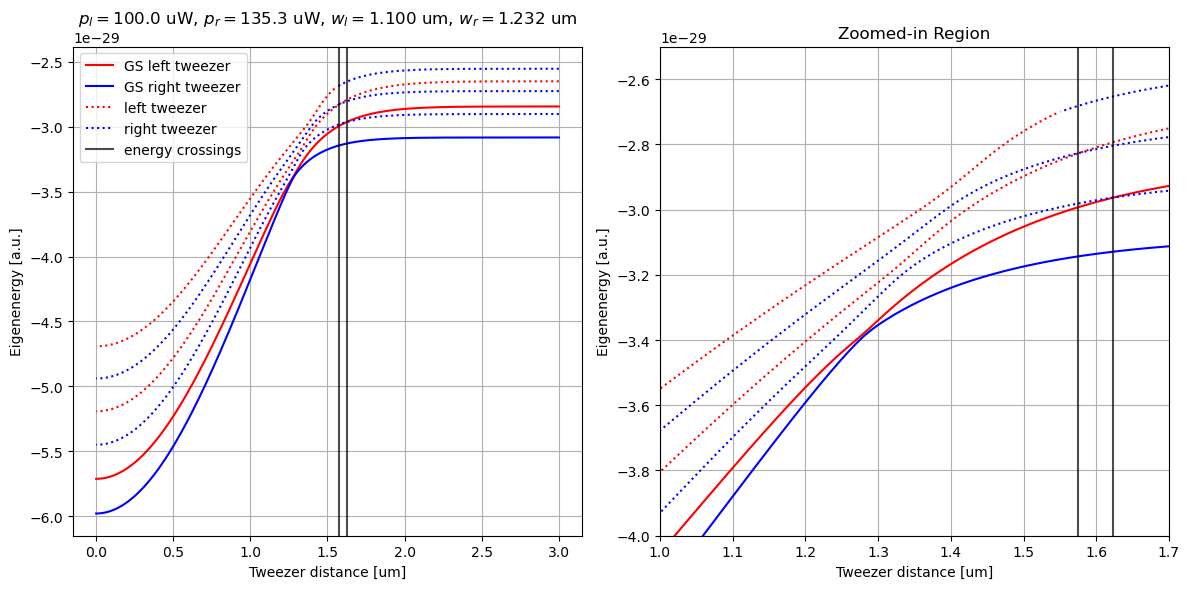

crossover of states [[4 5]] at 2.39um


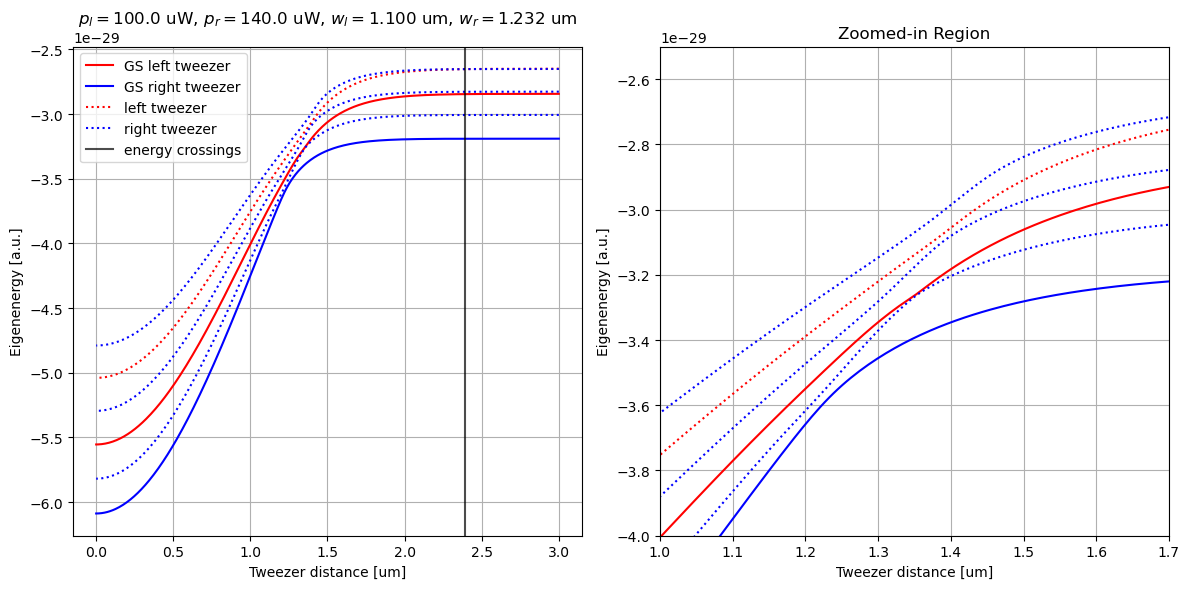

In [5]:
#set the waists to be sligthly different and compensate by changing the power

power2_factors = np.linspace(1.26,1.4,4)

for i, pow in enumerate(power2_factors):
    #make sure the powers and waists are set correctly
    trap[trap.power_tweezer1] = initial_power
    trap[trap.power_tweezer2] = initial_power*pow

    trap[trap.waist_tweezer1] = initial_waist
    trap[trap.waist_tweezer2] = initial_waist*1.12
    
    #calculate eigenenergies
    distances = np.linspace(initial_distance,0*si.um,500)
    energies, states, potentials = loop_distances(trap, distances,n_levels=6,n_pot_steps=2000)

    new_energies, new_states, new_potentials, index_top, index, swap_index = swapped_loop_distance(distances, energies, states, potentials)
    energies_left, energies_right, states_left, states_right,deltaE_min, occ_num = find_ass_tweezer(new_energies,new_states)

    # Create the figure with two subplots (1 row, 2 columns)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the full range on ax1
    ax1.plot(distances/si.um, energies_left[:, 0], color="red", label="GS left tweezer")
    ax1.plot(distances/si.um, energies_right[:, 0], color="blue", label="GS right tweezer")
    ax1.plot(distances/si.um, energies_left[:, 1:], color="red", linestyle="dotted", label="left tweezer")
    ax1.plot(distances/si.um, energies_right[:, 1:], color="blue", linestyle="dotted", label="right tweezer")

    for i, ind in enumerate(index):
        ax1.axvline(distances[ind]/si.um, color="k", alpha=0.7, label="energy crossings")

    ax1.set_xlabel("Tweezer distance [um]")
    ax1.set_ylabel("Eigenenergy [a.u.]")
    ax1.set_title(fr"$p_l={float(trap.subs(trap.power_tweezer1))/si.uW:.1f}$ uW, $p_r={float(trap.subs(trap.power_tweezer2))/si.uW:.1f}$ uW, $w_l={float(trap.subs(trap.waist_tweezer1))/si.um:.3f}$ um, $w_r={float(trap.subs(trap.waist_tweezer2))/si.um:.3f}$ um")
    ax1.grid()

    # Plot the zoomed-in range (1 to 1.5 µm) on ax2
    ax2.plot(distances/si.um, energies_left[:, 0], color="red", label="GS left tweezer")
    ax2.plot(distances/si.um, energies_right[:, 0], color="blue", label="GS right tweezer")
    ax2.plot(distances/si.um, energies_left[:, 1:], color="red", linestyle="dotted", label="left tweezer")
    ax2.plot(distances/si.um, energies_right[:, 1:], color="blue", linestyle="dotted", label="right tweezer")

    for i, ind in enumerate(index):
        ax2.axvline(distances[ind]/si.um, color="k", alpha=0.7, label="energy crossings")

    ax2.set_xlabel("Tweezer distance [um]")
    ax2.set_ylabel("Eigenenergy [a.u.]")
    ax2.set_title("Zoomed-in Region")
    ax2.set_xlim(1, 1.7)  # Zooming in on the region between 1.0 and 1.5 µm
    ax2.set_ylim(-4e-29,-2.5e-29)
    ax2.grid()

    # Remove duplicates in the legend (labels that appear in both subplots)
    handles, labels = ax1.get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))  # Remove duplicates
    ax1.legend(unique_labels.values(), unique_labels.keys())

    # Show the plots
    plt.tight_layout()
    plt.show()
